# Predicting Sex

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
def add_model_line(axes, model, data, x_name, y_name):
    coefs = np.squeeze(model.coef_)
    intercept = model.intercept_
    min_x = data[x_name].min()
    max_x = data[x_name].max()
    
    min_y = data[y_name].min()
    max_y = data[y_name].max()
    
    def get_y(x):
        return ((-coefs[0] * x) - intercept[0]) / coefs[1]
    
    def get_x(y):
        return ((-coefs[1] * y) - intercept[0]) / coefs[0]
    
    def cap_points(x, y):
        x_out, y_out = [], []
        for x, y in zip(x, y):
            
            if y > max_y:
                x = get_x(max_y)
                y = get_y(x)
            elif y < min_y:
                x = get_x(min_y)
                y = get_y(x)
            
            x_out.append(x)
            y_out.append(y)
        return x_out, y_out

    X, Y = cap_points([min_x, max_x], [get_y(min_x), get_y(max_x)])
                
    axes.plot(X, Y)

## Artificial Data

### Generate the Data

In [3]:
import numpy as np

np.random.seed(42)

num_points = 750

female_weights = np.random.normal(145, 8, num_points // 2)
male_weights = np.random.normal(185, 8, num_points // 2)

female_heights = np.random.normal(5.1, .2, num_points // 2)
male_heights = np.random.normal(5.9, .2, num_points // 2)

male_flag = np.zeros(num_points // 2, 'int')
female_flag = np.ones(num_points // 2, 'int')

fake = pd.DataFrame(
    {
        'age' : np.random.uniform(25, 85, num_points),
        'weight' : np.concatenate((female_weights, male_weights)),
        'height' : np.concatenate((female_heights, male_heights)),
        'male' : np.concatenate((male_flag, female_flag))
    }
).sample(frac=1)

In [4]:
fake.head()

,age,weight,height,male
612,49.426389,187.239749,5.923916,1
734,63.689956,193.233245,5.944937,1
30,36.068575,140.186347,5.135540,0
252,72.306841,161.977250,5.111926,0
135,56.163152,157.399475,5.469341,0


### Visualize the Data

Text(0.5, 1.0, 'Height Distribution')

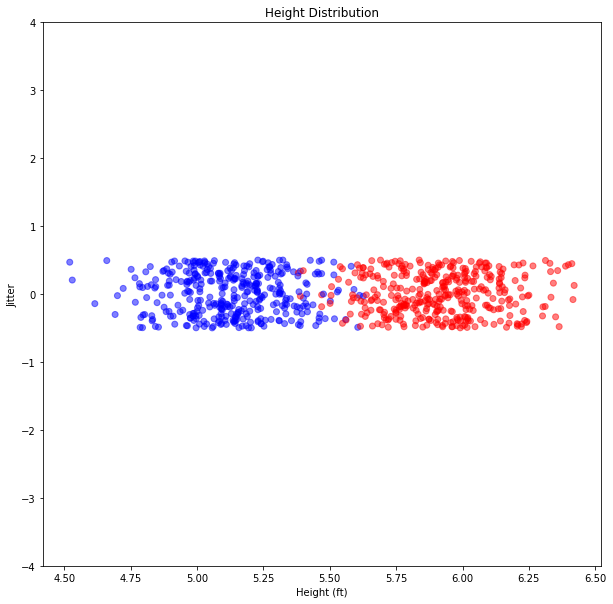

In [43]:
fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(fake.height, np.random.uniform(size=len(fake)) - .5, c=fake.male, cmap='bwr', alpha=.5)
axes.set_xlabel('Height (ft)')
axes.set_ylabel('Jitter')
axes.set_ylim([-4, 4])
axes.set_title("Height Distribution")

Text(0.5, 1.0, 'Weight Distribution')

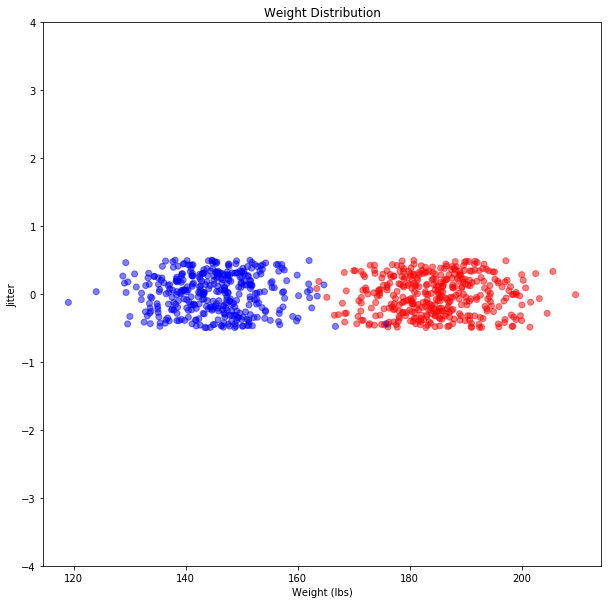

In [44]:
fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(fake.weight, np.random.uniform(size=len(fake)) - .5, c=fake.male, cmap='bwr', alpha=.5)
axes.set_xlabel('Weight (lbs)')
axes.set_ylabel('Jitter')
axes.set_ylim([-4, 4])
axes.set_title("Weight Distribution")

Text(0.5, 1.0, 'Height and Weight')

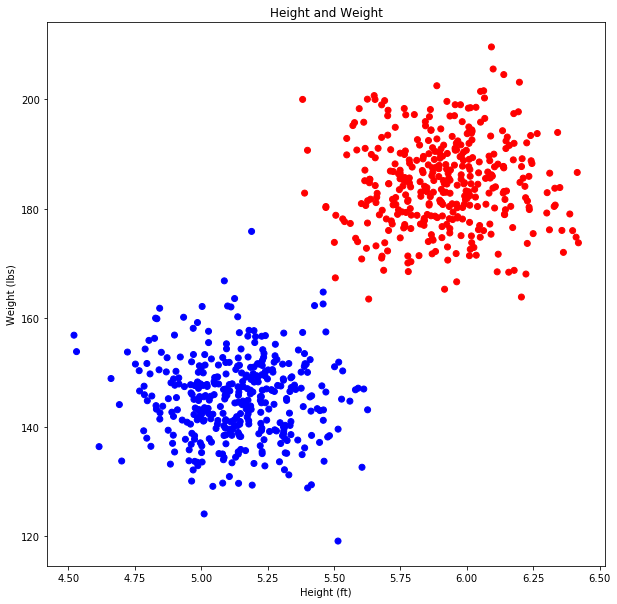

In [45]:
fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(fake.height, fake.weight, c=fake.male, cmap='bwr')
axes.set_xlabel('Height (ft)')
axes.set_ylabel('Weight (lbs)')
axes.set_title("Height and Weight")

### Fit a Model

In [8]:
train = fake.iloc[: int(num_points * .8)]
# train = fake
test = fake.iloc[int(num_points * .8) :]

In [9]:
import sklearn
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC

model = SVC(kernel='linear', C=100)
# model = LogisticRegression(C=10000)

model.fit(train[['height', 'weight']].to_numpy(), train.male)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
from sklearn.metrics import precision_recall_fscore_support

preds = model.predict(test[['height', 'weight']].to_numpy())
prec, rec, f, _ = precision_recall_fscore_support(test.male, preds, average='binary')
print(f"""
Precision: {prec :.3f}
Recall: {rec :.3f}
F-Score: {f :.3f}
""")


Precision: 0.988
Recall: 0.988
F-Score: 0.988



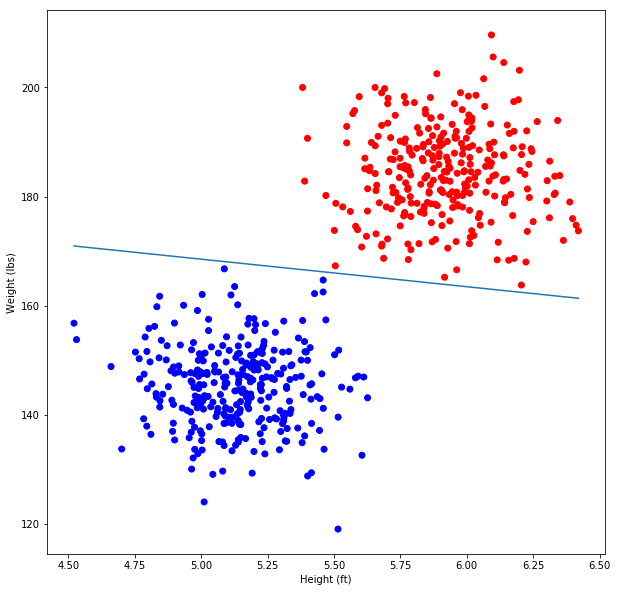

In [17]:
fig, axes = plt.subplots(figsize=(10, 10))

data = train

axes.scatter(data.height, data.weight, c=data.male, cmap='bwr')
axes.set_xlabel('Height (ft)')
axes.set_ylabel('Weight (lbs)')
add_model_line(axes, model, train, 'height', 'weight')

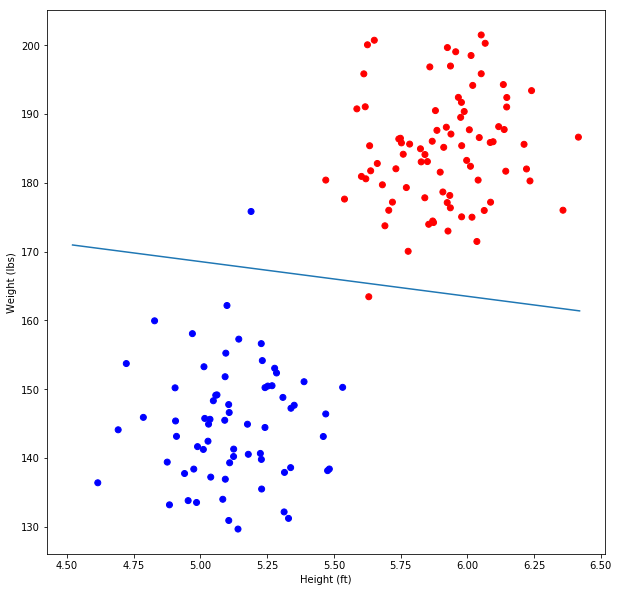

In [18]:
fig, axes = plt.subplots(figsize=(10, 10))

data = test

axes.scatter(data.height, data.weight, c=data.male, cmap='bwr')
axes.set_xlabel('Height (ft)')
axes.set_ylabel('Weight (lbs)')
add_model_line(axes, model, train, 'height', 'weight')

## Use Kung San Population Data

In [19]:
d_raw = pd.read_csv('./data/KungSan/1.csv')
d_raw.describe()

,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


In [20]:
d = (d_raw
     .assign(height=lambda x: x.height * 0.393701 / 12,
             weight=lambda x: x.weight * 2.20462,
            )
    )
d.describe()

,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,4.536210,78.507880,29.344393,0.472426
std,0.905593,32.450195,20.746888,0.499699
min,1.770834,9.374981,0.000000,0.000000
25%,4.104169,48.518653,12.000000,0.000000
50%,4.875003,88.312323,27.000000,0.000000
75%,5.166669,104.077916,43.000000,1.000000
max,5.875003,138.874722,88.000000,1.000000


In [21]:
import matplotlib.pyplot as plt
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

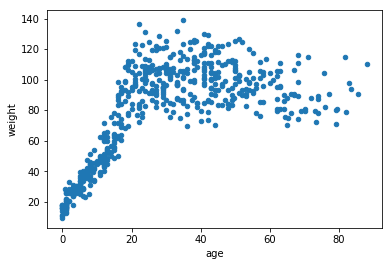

In [46]:
# d.plot('age', 'height', kind='scatter')
d.plot('age', 'weight', kind='scatter')

Text(0, 0.5, 'Weight (lbs)')

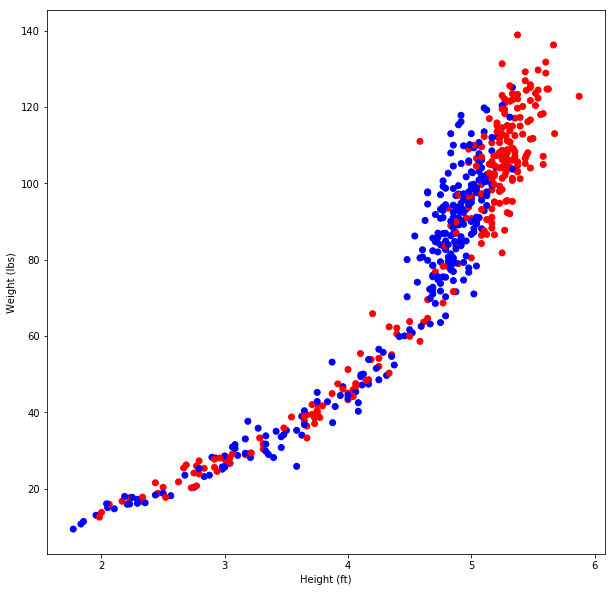

In [50]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(d.height, d.weight, c=d.male, cmap='bwr')
axes.set_xlabel('Height (ft)')
axes.set_ylabel('Weight (lbs)')

Text(0, 0.5, 'Weight (lbs)')

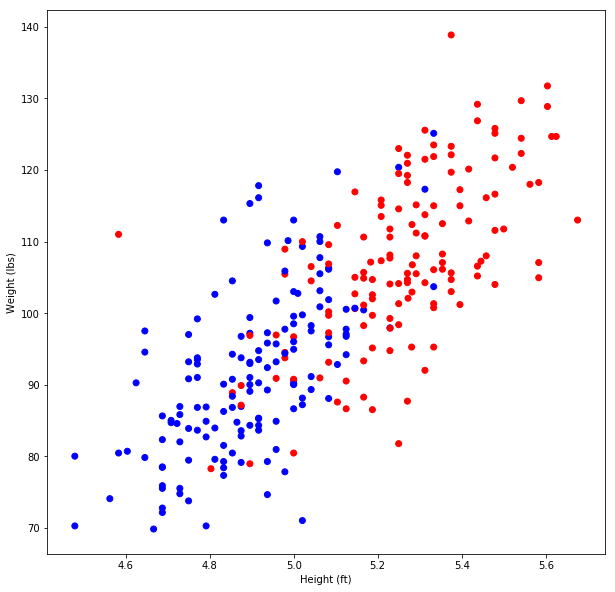

In [52]:
d_ = d.query('age > 25')

fig, axes = plt.subplots(figsize=(10, 10))

axes.scatter(d_.height, d_.weight, c=d_.male, cmap='bwr')
axes.set_xlabel('Height (ft)')
axes.set_ylabel('Weight (lbs)')

#### Same Plots Using Pandas

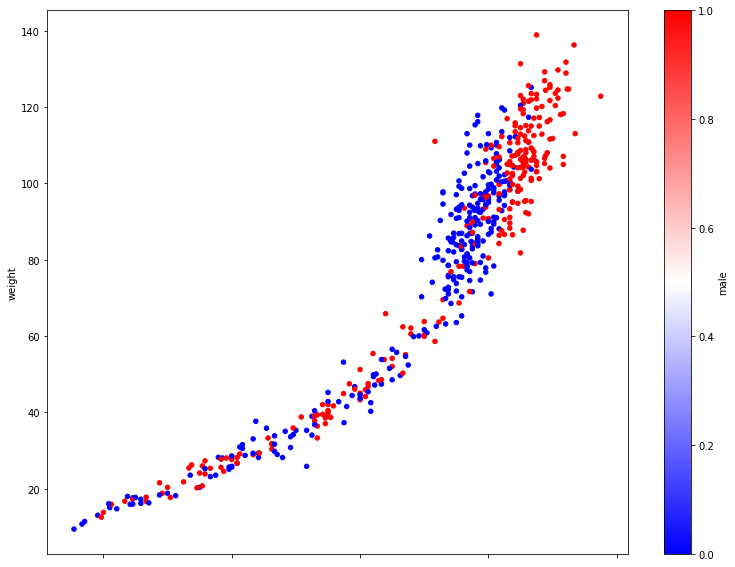

In [63]:
d.plot('height', 'weight', kind='scatter', c='male', cmap='bwr', figsize=(13, 10))

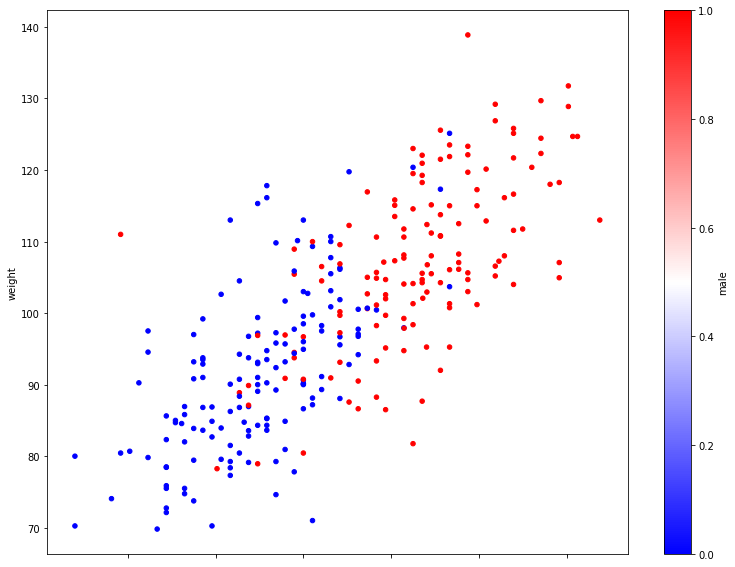

In [64]:
d.query('age > 25').plot('height', 'weight', kind='scatter', c='male', cmap='bwr', figsize=(13, 10))

#### Fit a Model

In [25]:
d_model = d_.sample(frac=1)
num_points = len(d_model)
train = d_model.iloc[: int(num_points * .8)]
# train = fake
test = d_model.iloc[int(num_points * .8) :]

In [26]:
import sklearn
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC

model = SVC(kernel='linear', C=100)
# model = LogisticRegression(C=10000)

model.fit(train[['height', 'weight']].to_numpy(), train.male)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
from sklearn.metrics import precision_recall_fscore_support

preds = model.predict(test[['height', 'weight']].to_numpy())
prec, rec, f, _ = precision_recall_fscore_support(test.male, preds, average='binary')
print(f"""
Precision: {prec :.3f}
Recall: {rec :.3f}
F-Score: {f :.3f}
""")


Precision: 0.889
Recall: 0.800
F-Score: 0.842



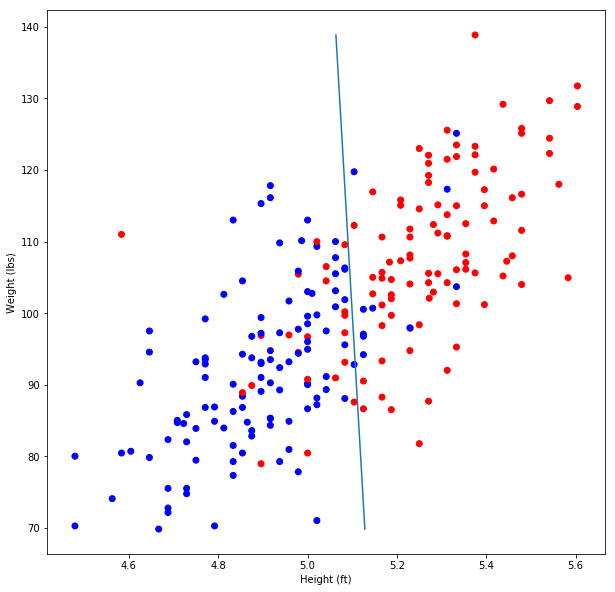

In [32]:
fig, axes = plt.subplots(figsize=(10, 10))

data = train

axes.scatter(data.height, data.weight, c=data.male, cmap='bwr')
axes.set_xlabel('Height (ft)')
axes.set_ylabel('Weight (lbs)')
add_model_line(axes, model, train, 'height', 'weight')

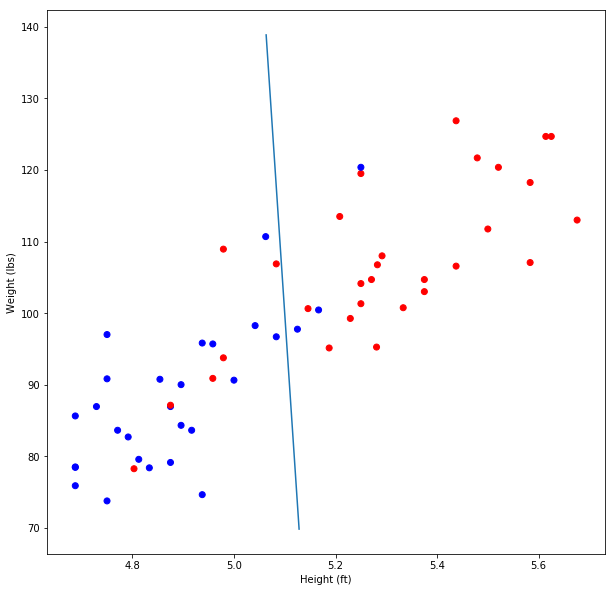

In [33]:
fig, axes = plt.subplots(figsize=(10, 10))

data = test

axes.scatter(data.height, data.weight, c=data.male, cmap='bwr')
axes.set_xlabel('Height (ft)')
axes.set_ylabel('Weight (lbs)')
add_model_line(axes, model, train, 'height', 'weight')

# Classifying with Pipelines

In [56]:
pima_raw = pd.read_csv('./data/pima-indians-diabetes.csv', names=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Class"])
pima_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
pima_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
pima = pima_raw

In [61]:
pima_modeling = pima.sample(frac=1)
num_points = len(pima_modeling)
train = pima_modeling.iloc[: int(num_points * .8)]
test = pima_modeling.iloc[int(num_points * .8) :]

In [93]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import Normalizer

from sklearn.feature_selection import chi2, SelectKBest

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, precision_recall_fscore_support, make_scorer

In [94]:
normalize = Normalizer(copy=False)
select = SelectKBest(chi2)
random_forest = RandomForestClassifier()

params = {
    'select__k' : ['all', 1, 3, 5],
    'random_forest__n_estimators' : [100, 500, 1000],
    'random_forest__max_depth' : [1, 3, 7]
}

pipeline = Pipeline(steps=[
    ('normalize', normalize),
    ('select', select),
    ('random_forest', random_forest)
])

scoring = {
    'recall' : make_scorer(recall_score),
    'precision' : make_scorer(precision_score),
    'f1' : make_scorer(f1_score),
    'auroc' : make_scorer(roc_auc_score)
}

grid_search = GridSearchCV(
    pipeline, 
    params, 
    cv=5, 
    n_jobs=-1,
    scoring=scoring,
    refit='f1',
    verbose=2,
    return_train_score=True,
    iid=False
)

grid_search.fit(train.drop('Class', axis=1).to_numpy(), train.Class.to_numpy())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   29.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('normalize', Normalizer(copy=False, norm='l2')), ('select', SelectKBest(k=10, score_func=<function chi2 at 0x12d5b0598>)), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
     ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'select__k': ['all', 1, 3, 5], 'random_forest__n_estimators': [100, 500, 1000], 'random_forest__max_depth': [1, 3, 7]},
       pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
       scoring={'recall': make_scorer(recall_score), 'precision': make_scorer(precision_score), 'f1': make_scorer(f1_score), 'auroc': make_scorer(roc_auc_score)},
       verbose=2)

In [95]:
results = pd.DataFrame(grid_search.cv_results_)
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 68 columns):
mean_fit_time                        36 non-null float64
std_fit_time                         36 non-null float64
mean_score_time                      36 non-null float64
std_score_time                       36 non-null float64
param_random_forest__max_depth       36 non-null object
param_random_forest__n_estimators    36 non-null object
param_select__k                      36 non-null object
params                               36 non-null object
split0_test_recall                   36 non-null float64
split1_test_recall                   36 non-null float64
split2_test_recall                   36 non-null float64
split3_test_recall                   36 non-null float64
split4_test_recall                   36 non-null float64
mean_test_recall                     36 non-null float64
std_test_recall                      36 non-null float64
rank_test_recall                     36 non-nu

In [98]:
results.loc[results.mean_test_f1.idxmax()]

mean_fit_time                                                                  1.41135
std_fit_time                                                                 0.0573398
mean_score_time                                                               0.311969
std_score_time                                                               0.0825419
param_random_forest__max_depth                                                       7
param_random_forest__n_estimators                                                 1000
param_select__k                                                                      5
params                               {'random_forest__max_depth': 7, 'random_forest...
split0_test_recall                                                                0.25
split1_test_recall                                                            0.522727
split2_test_recall                                                            0.363636
split3_test_recall                         

In [96]:
results.mean_test_f1.idxmax()

35

In [97]:
grid_search.best_index_

35

In [99]:
grid_search.best_score_

0.4516509016699251

In [100]:
preds = grid_search.predict(test.drop('Class', axis=1).to_numpy())
prec, rec, f, _ = precision_recall_fscore_support(test.Class, preds, average='binary')
print(f"""
Precision: {prec :.3f}
Recall: {rec :.3f}
F-Score: {f :.3f}
""")


Precision: 0.593
Recall: 0.320
F-Score: 0.416

